In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ucb import *

In [21]:
interval = 50
# arm_rewards = {
#     0: np.hstack((.2 * np.ones(interval), 0.8 * np.ones(interval), 0.8*np.ones(interval))),
#     1: np.hstack((.8 * np.ones(interval), 0.2 * np.ones(interval), 0.2*np.ones(interval))),
# }

arm_rewards = {
    0: np.hstack((-0.75 * np.ones(interval), 0.75 * np.ones(interval))),
    1: np.hstack((0.75 * np.ones(interval), -0.75 * np.ones(interval))),
}


rewardArray = np.vstack(list(arm_rewards.values()))
isChangepoint = np.hstack([False, np.any(np.diff(rewardArray, axis=1), axis=0)])

arm_colors = {
    0: "mediumseagreen",
    1: "tomato",
}

HORIZON = len(arm_rewards[0])
N_ARMS = len(arm_rewards)
N_TRIALS = 100

ucbs = np.zeros((N_ARMS, HORIZON, N_TRIALS))
means = np.zeros((N_ARMS, HORIZON, N_TRIALS))
regret = np.zeros((HORIZON, N_TRIALS))
numSamples = np.zeros((N_ARMS, HORIZON, N_TRIALS))

for m in range(N_TRIALS):
    ucbPlayer = Ucb(rewardArray[:,0], delta=0.05)
    for t in range(HORIZON):
        # check if any arm has changed
        if isChangepoint[t]:
            ucbPlayer.switchArms(rewardArray[:,t])

        ucbPlayer.sample()
        regret[t,m] = ucbPlayer.regret
        ucbs[:,t,m] = ucbPlayer.getUCBs()
        means[:,t,m] = ucbPlayer.muHats
        numSamples[:,t,m] = ucbPlayer.T

C:\Users\Jennifer Rogers\OneDrive - UW\Documents\Classes\599_NonStochastic\599m-sp21-switching-bandits\ucb.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  ucbs[i] = self.muHats[i] + np.sqrt(2*np.log(f_t)/self.T[i])


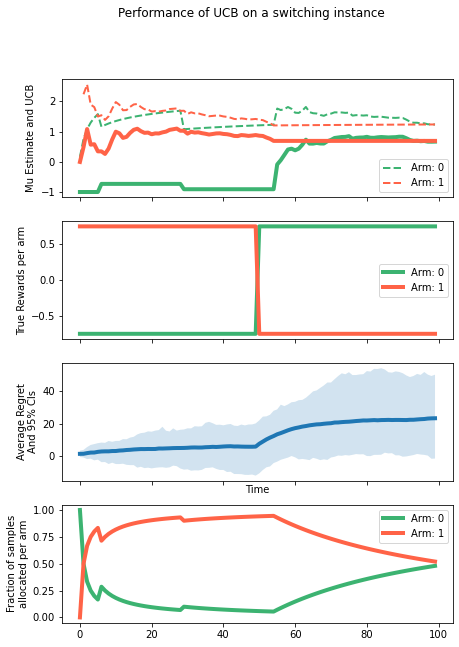

In [23]:

"""Plot the arm rewards, etc etc, through time t (this allows us to update the plot as time evolves)"""
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(7, 10))

times = np.arange(HORIZON)
for arm_idx in range(N_ARMS):
    ucb = ucbs[arm_idx,:,0] # Only plot the first instance
    ax[0].plot(times, ucb, label=f"Arm: {arm_idx}", c=arm_colors[arm_idx], linewidth=2, linestyle='--')
for arm_idx in range(N_ARMS):
    mean = means[arm_idx,:,0]
    ax[0].plot(times, mean, c=arm_colors[arm_idx], linewidth=4)
ax[0].legend()
ax[0].set_ylabel("Mu Estimate and UCB")

for arm_idx, weight in arm_rewards.items():
    ax[1].plot(times, weight, label=f"Arm: {arm_idx}", c=arm_colors[arm_idx], linewidth=4)
ax[1].legend()
ax[1].set_ylabel("True Rewards per arm")


# Plot regret
regret = np.sort(regret, axis=1)
ax[2].plot(times, np.mean(regret, axis=1), linewidth=4)
ax[2].fill_between(times, 
                   regret[:,int(0.025*N_TRIALS)],
                   regret[:,int(0.975*N_TRIALS)],
                   linewidth=4, alpha=0.2)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Average Regret\nAnd 95% CIs")

for arm_idx in range(N_ARMS):
    frac = numSamples[arm_idx,:,0]/np.sum(numSamples[:,:,0], axis=0)
    ax[3].plot(times, frac, label=f"Arm: {arm_idx}", c=arm_colors[arm_idx], linewidth=4)
ax[3].legend()
ax[3].set_ylabel("Fraction of samples\nallocated per arm")

plt.suptitle("Performance of UCB on a switching instance")
plt.savefig("plots/ucbSwitch.pdf", bbox_inches="tight")
plt.show()